# Parte 1 - Tratando os Dados

In [1]:
import pandas as pd

In [2]:
cadastrados = pd.read_csv('https://raw.githubusercontent.com/giulianafernandes/credit_card_approval_prediction/main/dados/clientes_cadastrados.csv')

In [3]:
cadastrados.head(3)

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0


In [4]:
cadastrados.shape

(438557, 18)

In [5]:
cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438557 non-null  int64  
 1   Genero                 438557 non-null  object 
 2   Tem_carro              438557 non-null  object 
 3   Tem_casa_propria       438557 non-null  object 
 4   Qtd_filhos             438557 non-null  int64  
 5   Rendimento_anual       438557 non-null  float64
 6   Categoria_de_renda     438557 non-null  object 
 7   Grau_escolaridade      438557 non-null  object 
 8   Estado_civil           438557 non-null  object 
 9   Moradia                438557 non-null  object 
 10  Idade                  438557 non-null  int64  
 11  Anos_empregado         438557 non-null  int64  
 12  Tem_celular            438557 non-null  int64  
 13  Tem_telefone_trabalho  438557 non-null  int64  
 14  Tem_telefone_fixo      438557 non-nu

## Renomeando as colunas

In [6]:
columns_list = cadastrados.columns.tolist()
print(columns_list)

['ID_Cliente', 'Genero', 'Tem_carro', 'Tem_casa_propria', 'Qtd_filhos', 'Rendimento_anual', 'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil', 'Moradia', 'Idade', 'Anos_empregado', 'Tem_celular', 'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email', 'Ocupacao', 'Tamanho_familia']


In [7]:
cadastrados = cadastrados.rename(columns={'ID_Cliente': 'id_cliente', 
                            'Genero': 'genero',
                            'Tem_carro': 'tem_carro', 
                            'Tem_casa_propria': 'tem_casa', 
                            'Qtd_filhos': 'qtd_filhos', 
                            'Rendimento_anual': 'rendimento_anual', 
                            'Categoria_de_renda': 'categoria_renda', 
                            'Grau_escolaridade': 'grau_escolaridade', 
                            'Estado_civil': 'estado_civil', 
                            'Moradia': 'moradia', 
                            'Idade': 'idade', 
                            'Anos_empregado': 'anos_empregado', 
                            'Tem_celular': 'tem_celular', 
                            'Tem_telefone_trabalho': 'tem_telefone_trabalho', 
                            'Tem_telefone_fixo': 'tem_telefone_fixo', 
                            'Tem_email': 'tem_email', 
                            'Ocupacao': 'ocupacao', 
                            'Tamanho_familia': 'tam_familia'
    })

In [8]:
cadastrados.head(3)

,id_cliente,genero,tem_carro,tem_casa,qtd_filhos,rendimento_anual,categoria_renda,grau_escolaridade,estado_civil,moradia,idade,anos_empregado,tem_celular,tem_telefone_trabalho,tem_telefone_fixo,tem_email,ocupacao,tam_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0


## Checando se existem ids duplicados

In [9]:
cadastrados['id_cliente'].value_counts()

id_cliente
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: count, Length: 438510, dtype: int64

In [10]:
cadastrados[cadastrados['id_cliente'].duplicated(keep=False)].shape
# existem 94 ids duplicados

(94, 18)

In [11]:
ids_repetidos = cadastrados[cadastrados['id_cliente'].duplicated(keep=False)]

In [12]:
cadastrados_limpo = cadastrados.drop(ids_repetidos.index)

In [13]:
cadastrados_limpo['id_cliente'].value_counts()

id_cliente
5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: count, Length: 438463, dtype: int64

## Tratando os dados nulos

In [14]:
cadastrados_limpo.isnull().sum()

id_cliente                    0
genero                        0
tem_carro                     0
tem_casa                      0
qtd_filhos                    0
rendimento_anual              0
categoria_renda               0
grau_escolaridade             0
estado_civil                  0
moradia                       0
idade                         0
anos_empregado                0
tem_celular                   0
tem_telefone_trabalho         0
tem_telefone_fixo             0
tem_email                     0
ocupacao                 134177
tam_familia                   0
dtype: int64

In [15]:
# tratando a coluna ocupacao, que tem 134177 dados nulos

In [16]:
cadastrados_limpo['ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [17]:
cadastrados_limpo['ocupacao'].fillna(value='Outro', inplace=True)

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/1467502602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cadastrados_limpo['ocupacao'].fillna(value='Outro', inplace=True)


In [18]:
cadastrados_limpo.isnull().sum()

id_cliente               0
genero                   0
tem_carro                0
tem_casa                 0
qtd_filhos               0
rendimento_anual         0
categoria_renda          0
grau_escolaridade        0
estado_civil             0
moradia                  0
idade                    0
anos_empregado           0
tem_celular              0
tem_telefone_trabalho    0
tem_telefone_fixo        0
tem_email                0
ocupacao                 0
tam_familia              0
dtype: int64

## Tratando os valores das colunas

In [19]:
cadastrados_limpo.nunique()

id_cliente               438463
genero                        2
tem_carro                     2
tem_casa                      2
qtd_filhos                   12
rendimento_anual            866
categoria_renda               5
grau_escolaridade             5
estado_civil                  5
moradia                       6
idade                     16379
anos_empregado             9406
tem_celular                   1
tem_telefone_trabalho         2
tem_telefone_fixo             2
tem_email                     2
ocupacao                     19
tam_familia                  13
dtype: int64

In [20]:
# removendo a coluna de genero, pois pode gerar um viés no nosso modelo de ml

In [21]:
cadastrados_limpo.drop('genero', axis=1, inplace=True)

In [22]:
cadastrados_limpo.drop('tem_celular', axis=1, inplace=True)

In [23]:
cadastrados_limpo['tem_carro'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
cadastrados_limpo['tem_casa'].unique()

array(['Y', 'N'], dtype=object)

In [25]:
cadastrados_limpo['tem_telefone_trabalho'].unique()

array([1, 0])

In [26]:
cadastrados_limpo['tem_telefone_fixo'].unique()

array([0, 1])

In [27]:
cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_cliente             438463 non-null  int64  
 1   tem_carro              438463 non-null  object 
 2   tem_casa               438463 non-null  object 
 3   qtd_filhos             438463 non-null  int64  
 4   rendimento_anual       438463 non-null  float64
 5   categoria_renda        438463 non-null  object 
 6   grau_escolaridade      438463 non-null  object 
 7   estado_civil           438463 non-null  object 
 8   moradia                438463 non-null  object 
 9   idade                  438463 non-null  int64  
 10  anos_empregado         438463 non-null  int64  
 11  tem_telefone_trabalho  438463 non-null  int64  
 12  tem_telefone_fixo      438463 non-null  int64  
 13  tem_email              438463 non-null  int64  
 14  ocupacao               438463 non-null  o

In [28]:
cadastrados_limpo['tem_carro'] = cadastrados_limpo['tem_carro'].replace(['Y', 'N'], [1, 0])

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/77457946.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cadastrados_limpo['tem_carro'] = cadastrados_limpo['tem_carro'].replace(['Y', 'N'], [1, 0])


In [29]:
cadastrados_limpo['tem_casa'] = cadastrados_limpo['tem_casa'].replace(['Y', 'N'], [1, 0])

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/1548733340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cadastrados_limpo['tem_casa'] = cadastrados_limpo['tem_casa'].replace(['Y', 'N'], [1, 0])


In [30]:
cadastrados_limpo.head(3)

,id_cliente,tem_carro,tem_casa,qtd_filhos,rendimento_anual,categoria_renda,grau_escolaridade,estado_civil,moradia,idade,anos_empregado,tem_telefone_trabalho,tem_telefone_fixo,tem_email,ocupacao,tam_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0


In [31]:
cadastrados_limpo['idade'] = -cadastrados_limpo['idade']/365.2425

In [32]:
cadastrados_limpo['anos_empregado'] = -cadastrados_limpo['anos_empregado']/365.2425

In [33]:
cadastrados_limpo.head(3)

,id_cliente,tem_carro,tem_casa,qtd_filhos,rendimento_anual,categoria_renda,grau_escolaridade,estado_civil,moradia,idade,anos_empregado,tem_telefone_trabalho,tem_telefone_fixo,tem_email,ocupacao,tam_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0


In [34]:
cadastrados_limpo['anos_empregado'].value_counts()

anos_empregado
-1000.001369    75314
 0.596864         262
 4.594208         251
 0.681739         241
 2.677673         240
                ...  
 37.041144          1
 27.989623          1
 24.413917          1
 31.291539          1
 22.190736          1
Name: count, Length: 9406, dtype: int64

In [35]:
cadastrados_limpo.loc[cadastrados_limpo['anos_empregado']<0, 'anos_empregado']=0

In [36]:
cadastrados_limpo['anos_empregado'].value_counts()

anos_empregado
0.000000     75314
0.596864       262
4.594208       251
0.681739       241
2.677673       240
             ...  
37.041144        1
27.989623        1
24.413917        1
31.291539        1
22.190736        1
Name: count, Length: 9406, dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_cliente             438463 non-null  int64  
 1   tem_carro              438463 non-null  int64  
 2   tem_casa               438463 non-null  int64  
 3   qtd_filhos             438463 non-null  int64  
 4   rendimento_anual       438463 non-null  float64
 5   categoria_renda        438463 non-null  object 
 6   grau_escolaridade      438463 non-null  object 
 7   estado_civil           438463 non-null  object 
 8   moradia                438463 non-null  object 
 9   idade                  438463 non-null  float64
 10  anos_empregado         438463 non-null  float64
 11  tem_telefone_trabalho  438463 non-null  int64  
 12  tem_telefone_fixo      438463 non-null  int64  
 13  tem_email              438463 non-null  int64  
 14  ocupacao               438463 non-null  o

In [39]:
# separando colunas numericas em um dataframe
cadastrados_num = cadastrados_limpo.drop(['categoria_renda', 'grau_escolaridade', 
                                          'estado_civil', 'moradia', 'ocupacao'], axis=1)

In [40]:
cadastrados_num.head(3)

,id_cliente,tem_carro,tem_casa,qtd_filhos,rendimento_anual,idade,anos_empregado,tem_telefone_trabalho,tem_telefone_fixo,tem_email,tam_familia
0,5008804,1,1,0,427500.0,32.868574,12.435574,1,0,0,2.0
1,5008805,1,1,0,427500.0,32.868574,12.435574,1,0,0,2.0
2,5008806,1,1,0,112500.0,58.793815,3.104787,0,0,0,2.0


<Axes: >

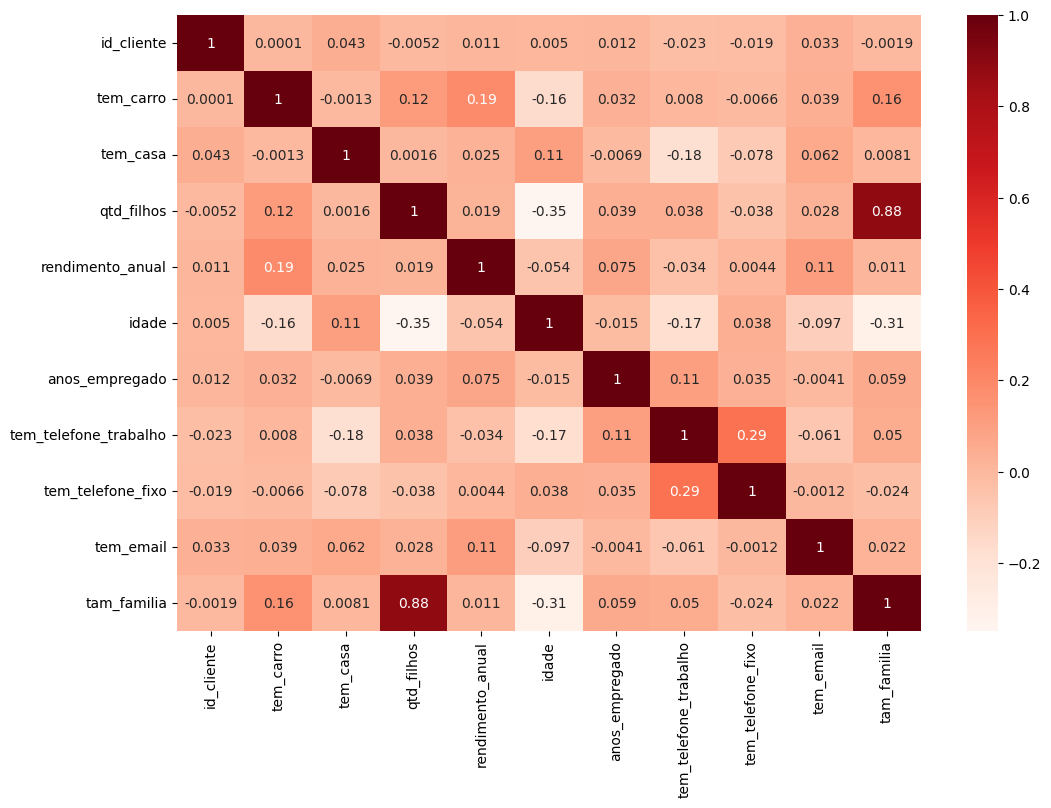

In [41]:
corr = cadastrados_num.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Reds', annot=True)

In [42]:
cadastrados_limpo.drop(['qtd_filhos'], axis=1, inplace=True)

In [43]:
cadastrados_limpo.head(2)

,id_cliente,tem_carro,tem_casa,rendimento_anual,categoria_renda,grau_escolaridade,estado_civil,moradia,idade,anos_empregado,tem_telefone_trabalho,tem_telefone_fixo,tem_email,ocupacao,tam_familia
0,5008804,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0


In [44]:
# organizando as features
cadastrados_limpo = cadastrados_limpo[['id_cliente', 'tem_carro', 'tem_casa', 'tem_telefone_trabalho', 
                                       'tem_telefone_fixo', 'tem_email', 'rendimento_anual', 'tam_familia', 'idade',
                                       'anos_empregado', 'categoria_renda', 'grau_escolaridade', 'estado_civil', 
                                       'moradia', 'ocupacao']]

In [45]:
cadastrados_limpo.head(3)

,id_cliente,tem_carro,tem_casa,tem_telefone_trabalho,tem_telefone_fixo,tem_email,rendimento_anual,tam_familia,idade,anos_empregado,categoria_renda,grau_escolaridade,estado_civil,moradia,ocupacao
0,5008804,1,1,1,0,0,427500.0,2.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,427500.0,2.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,112500.0,2.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança


In [46]:
colunas_quantitativas = ['tam_familia', 'rendimento_anual', 'idade', 'anos_empregado']
cadastrados_limpo[colunas_quantitativas].describe()

,tam_familia,rendimento_anual,idade,anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,2.194461,1.875220e+05,43.800857,5.948371
std,0.897194,1.100832e+05,11.458262,6.564112
min,1.000000,2.610000e+04,20.504186,0.000000
25%,2.000000,1.215000e+05,34.262168,1.015763
50%,2.000000,1.611000e+05,42.793487,4.019247
75%,3.000000,2.250000e+05,53.345380,8.495725
max,20.000000,6.750000e+06,68.997994,47.998248


In [47]:
cadastrados_limpo['categoria_renda'].value_counts(normalize=True)*100

categoria_renda
Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: proportion, dtype: float64

In [48]:
cadastrados_limpo['grau_escolaridade'].value_counts(normalize=True)*100

grau_escolaridade
Ensino médio                  68.821314
Ensino superior               26.797928
Ensino superior incompleto     3.385690
Ensino fundamental             0.923909
Pós-graduação                  0.071158
Name: proportion, dtype: float64

In [49]:
cadastrados_limpo['estado_civil'].value_counts(normalize=True)*100

estado_civil
Casado           68.367912
Solteiro         12.601976
União-estável     8.329323
Divorciado        6.214663
Viúvo             4.486125
Name: proportion, dtype: float64

In [50]:
cadastrados_limpo['moradia'].value_counts(normalize=True)*100

moradia
Casa/apartamento próprio    89.801876
Mora com os pais             4.349740
Habitação pública            3.241094
Apartamento alugado          1.362259
Apartamento comercial        0.894032
Cooperativa habitacional     0.350999
Name: proportion, dtype: float64

In [51]:
cadastrados_limpo['ocupacao'].value_counts(normalize=True)*100

ocupacao
Outro                   30.601670
Construção Civil        17.840730
Equipe principal         9.805388
Vendas                   9.371828
Gerência                 8.091219
Motorista                5.949191
Alta tecnologia          3.941724
Contabilidade            3.644549
Medicina                 3.083042
Cozinha                  1.841432
Segurança                1.822959
Limpeza                  1.332610
Serviço privado          0.787980
Baixa qualificação       0.488069
Secretariado             0.466174
Garçom                   0.379736
Corretor imobiliário     0.237420
RH                       0.176526
TI                       0.137754
Name: proportion, dtype: float64

In [52]:
'''tecnica para remocao de outliers a partir de um intervalor de confiança'''
coluna = cadastrados_limpo['rendimento_anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items():
    if valor > limite_sup or valor < limite_inf:
        index_outliers.append(index)
        
len(index_outliers)

12641

In [53]:
clientes_cad_sem_outliers = cadastrados_limpo.drop(index_outliers)
clientes_cad_sem_outliers.shape

(425822, 15)

In [54]:
clientes_cad_tratamento1 = clientes_cad_sem_outliers
clientes_cad_tratamento1.shape

(425822, 15)

# Parte 2 - Criando a variável Target

In [55]:
aprovados = pd.read_csv('https://raw.githubusercontent.com/giulianafernandes/credit_card_approval_prediction/main/dados/clientes_aprovados.csv')

In [56]:
aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [57]:
aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [58]:
aprovados = aprovados.rename(columns={'ID_Cliente': 'id_cliente',
                                      'Mes_referencia': 'mes_referencia',
                                      'Faixa_atraso': 'faixa_atraso'})

In [59]:
aprovados.head(2)

,id_cliente,mes_referencia,faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias


In [60]:
aprovados.query('id_cliente == 5001712')

,id_cliente,mes_referencia,faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [61]:
aprovados.query('id_cliente == 5001711')

,id_cliente,mes_referencia,faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [62]:
aprovados.faixa_atraso.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

In [63]:
registros_credito_agrupados_id  = aprovados.groupby('id_cliente')
abertura_credito = registros_credito_agrupados_id.apply(lambda x: min(x['mes_referencia']))
abertura_credito.name = 'abertura'
abertura_credito

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/273357217.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  abertura_credito = registros_credito_agrupados_id.apply(lambda x: min(x['mes_referencia']))


id_cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: abertura, Length: 45985, dtype: int64

In [64]:
abertura_credito.info()

<class 'pandas.core.series.Series'>
Index: 45985 entries, 5001711 to 5150487
Series name: abertura
Non-Null Count  Dtype
--------------  -----
45985 non-null  int64
dtypes: int64(1)
memory usage: 718.5 KB


In [65]:
clientes_aprovados = aprovados.merge(abertura_credito, on='id_cliente')
clientes_aprovados.head()

,id_cliente,mes_referencia,faixa_atraso,abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [66]:
credito_final = registros_credito_agrupados_id.apply(lambda x: max(x['mes_referencia']))
credito_final.name = 'final'
credito_final

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/4026752963.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  credito_final = registros_credito_agrupados_id.apply(lambda x: max(x['mes_referencia']))


id_cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: final, Length: 45985, dtype: int64

In [67]:
clientes_aprovados = clientes_aprovados.merge(credito_final, on='id_cliente')
clientes_aprovados.head()

,id_cliente,mes_referencia,faixa_atraso,abertura,final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [68]:
clientes_aprovados['janela'] = clientes_aprovados['final'] - clientes_aprovados['abertura']
clientes_aprovados.head()

,id_cliente,mes_referencia,faixa_atraso,abertura,final,janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [69]:
clientes_aprovados['MOB'] = clientes_aprovados['mes_referencia'] - clientes_aprovados['abertura']
clientes_aprovados.head()

,id_cliente,mes_referencia,faixa_atraso,abertura,final,janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [70]:
clientes_aprovados['faixa_atraso'].unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [71]:
dict_faixa_atraso = {'nenhum empréstimo': 0,
                     'pagamento realizado': 1,
                     '1-29 dias': 2,
                     '30-59 dias': 3,
                     '60-89 dias': 4,
                     '90-119 dias': 5,
                     '120-149 dias': 6,
                     '>150 dias': 7}

In [72]:
clientes_aprovados['indicador_faixa_atraso'] = clientes_aprovados['faixa_atraso'].map(dict_faixa_atraso)
clientes_aprovados.head()

,id_cliente,mes_referencia,faixa_atraso,abertura,final,janela,MOB,indicador_faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [73]:
clientes_aprovados['mau_pagador'] = clientes_aprovados.apply(lambda x: 1 if x['indicador_faixa_atraso'] >3 else 0, axis=1)

In [74]:
clientes_aprovados.head()

,id_cliente,mes_referencia,faixa_atraso,abertura,final,janela,MOB,indicador_faixa_atraso,mau_pagador
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [75]:
clientes_aprovados['mau_pagador'].value_counts(normalize=True)*100

mau_pagador
0    99.703979
1     0.296021
Name: proportion, dtype: float64

In [76]:
registros_credito_id = clientes_aprovados[['id_cliente', 'abertura', 'final', 
                                           'janela']].groupby('id_cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/2096997643.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'janela']].groupby('id_cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)


In [77]:
registros_credito_id

,id_cliente,abertura,final,janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [78]:
denominador = registros_credito_id.groupby('abertura').apply(lambda x: x['id_cliente'].count()).reset_index()
denominador.columns = ['abertura', 'qtd_clientes']
denominador

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/1200785384.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  denominador = registros_credito_id.groupby('abertura').apply(lambda x: x['id_cliente'].count()).reset_index()


,abertura,qtd_clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [79]:
vintage = clientes_aprovados.groupby(['abertura', 'MOB']).apply(lambda x: x['id_cliente'].count()).reset_index()
vintage.columns = ['abertura', 'MOB', 'qtd_clientes']
vintage

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/1152245337.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vintage = clientes_aprovados.groupby(['abertura', 'MOB']).apply(lambda x: x['id_cliente'].count()).reset_index()


,abertura,MOB,qtd_clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [80]:
vintage = pd.merge(vintage[['abertura', 'MOB']], denominador,
                   on='abertura', how='left')

In [81]:
vintage

,abertura,MOB,qtd_clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [82]:
import numpy as np

In [83]:
vintage['qtd_mau'] = np.nan #criando uma coluna e preenchendo apenas com valores nulos

for j in range(-60, 1):
    ls = []
    for i in range(0,61):
        due = list(clientes_aprovados.query('mau_pagador == 1 and MOB == @i and abertura == @j')['id_cliente'])
        ls.extend(due)
        vintage.loc[(vintage['MOB'] == i) & (vintage['abertura'] == j), 'qtd_mau'] = len(set(ls))
        
vintage['taxa_mau'] = vintage['qtd_mau'] / vintage['qtd_clientes']
vintage

,abertura,MOB,qtd_clientes,qtd_mau,taxa_mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [84]:
vintage_pivot = vintage.pivot(index='abertura', 
                              columns='MOB', 
                              values='taxa_mau')
vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


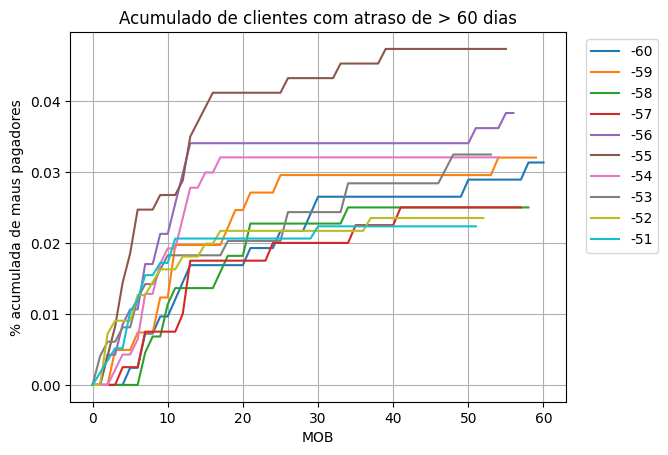

In [85]:
lst = [i for i in range(0,61)]
vintage_pivot[lst].T.iloc[:, :10].plot(legend=True, grid=True, title='Acumulado de clientes com atraso de > 60 dias')
plt.xlabel('MOB')
plt.ylabel('% acumulada de maus pagadores')
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

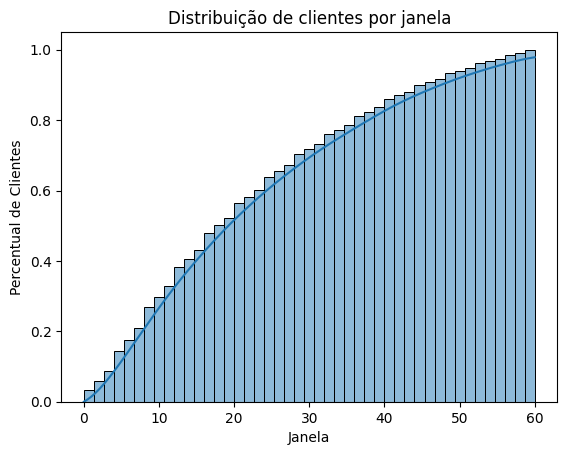

In [86]:
sns.histplot(data=registros_credito_id, x='janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de Clientes')
plt.show()

In [87]:
dict_intervalo_atraso = {'maior_30_dias': 3,
                         'maior_60_dias': 4,
                         'maior_90_dias': 5,
                         'maior_120_dias': 6,
                         'maior_150_dias': 7}

In [88]:
for chave, valor in dict_intervalo_atraso.items():
    clientes_aprovados[f'mau_{chave}'] = clientes_aprovados.apply(lambda x: 1 if x['indicador_faixa_atraso'] >= valor else 0, axis=1)
clientes_aprovados.head()

,id_cliente,mes_referencia,faixa_atraso,abertura,final,janela,MOB,indicador_faixa_atraso,mau_pagador,mau_maior_30_dias,mau_maior_60_dias,mau_maior_90_dias,mau_maior_120_dias,mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [89]:
dict_taxa_mau = {}
id_sum = len(set(clientes_aprovados['id_cliente']))

for chave in dict_intervalo_atraso.keys():
    df_min_mau = clientes_aprovados.query(f'mau_{chave} == 1').groupby('id_cliente')['MOB'].min().reset_index()
    df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'taxa_mau': np.nan})
    lst = []
    for i in range(0,61):
        due = df_min_mau.query('MOB == @i')['id_cliente'].to_list()
        lst.extend(due)
        df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'taxa_mau'] = len(set(lst)) / id_sum
    dict_taxa_mau[chave] = df_mob_taxa_mau['taxa_mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


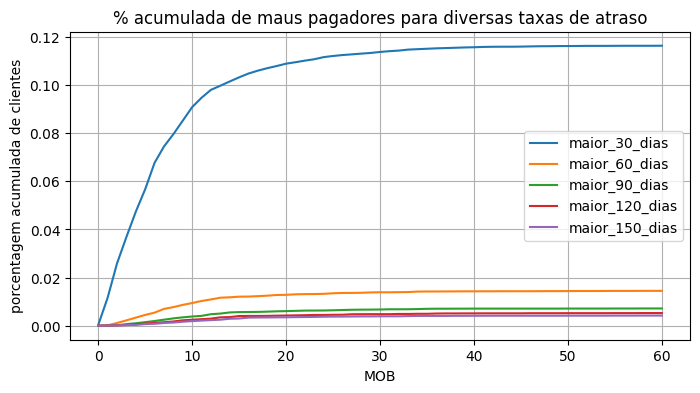

In [90]:
df_taxa_mau.plot(grid=True, title='% acumulada de maus pagadores para diversas taxas de atraso',
                 figsize=(8,4))
plt.xlabel('MOB')
plt.ylabel('porcentagem acumulada de clientes')
plt.show()

In [91]:
len(clientes_aprovados.query('janela >= 12').groupby('id_cliente').count().index)

30918

In [92]:
clientes_aprovados_tratamento1 = clientes_aprovados.query('janela >=12').copy()
clientes_aprovados_tratamento1.shape

(943061, 14)

In [93]:
def verifica(registros):
  lista_status = registros['faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_credito_id = pd.DataFrame(clientes_aprovados_tratamento1.groupby('id_cliente').apply(verifica)).reset_index()
df_registros_credito_id.columns = ['id_cliente', 'mau']
df_registros_credito_id.head()

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_11899/4201877178.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_registros_credito_id = pd.DataFrame(clientes_aprovados_tratamento1.groupby('id_cliente').apply(verifica)).reset_index()


,id_cliente,mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [94]:
df_registros_credito_id.shape

(30918, 2)

In [95]:
reg_clientes_target = clientes_cad_tratamento1.merge(df_registros_credito_id, on='id_cliente')
reg_clientes_target.head()

,id_cliente,tem_carro,tem_casa,tem_telefone_trabalho,tem_telefone_fixo,tem_email,rendimento_anual,tam_familia,idade,anos_empregado,categoria_renda,grau_escolaridade,estado_civil,moradia,ocupacao,mau
0,5008806,1,1,0,0,0,112500.0,2.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0
1,5008810,0,1,0,1,1,270000.0,1.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
2,5008811,0,1,0,1,1,270000.0,1.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
3,5008812,0,1,0,0,0,283500.0,1.0,61.504343,0.000000,Pensionista,Ensino superior,Divorciado,Casa/apartamento próprio,Outro,0
4,5008813,0,1,0,0,0,283500.0,1.0,61.504343,0.000000,Pensionista,Ensino superior,Divorciado,Casa/apartamento próprio,Outro,0


In [96]:
reg_clientes_target['mau'].value_counts(normalize=True)*100

mau
0    97.726673
1     2.273327
Name: proportion, dtype: float64

# Parte 3 - Machine Learning: Construindo a pipeline

In [97]:
df = reg_clientes_target

In [98]:
df.to_csv('df_clean.csv', index=False)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
seed = 1561651

In [101]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed)

In [102]:
train_df.shape

(18193, 16)

In [103]:
test_df.shape

(4549, 16)

In [104]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [105]:
train_df.to_csv('train.csv',index=False)

In [106]:
train_df.to_csv('test.csv',index=False)

In [107]:
train_df.head()

,id_cliente,tem_carro,tem_casa,tem_telefone_trabalho,tem_telefone_fixo,tem_email,rendimento_anual,tam_familia,idade,anos_empregado,categoria_renda,grau_escolaridade,estado_civil,moradia,ocupacao,mau
3806,5029272,1,1,1,1,0,116653.5,2.0,25.380398,4.547664,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,0
17766,5116598,0,0,0,1,0,144000.0,2.0,61.994428,0.000000,Pensionista,Ensino médio,Casado,Casa/apartamento próprio,Outro,0
16516,5112969,0,0,1,1,0,112500.0,2.0,50.790913,14.100221,Empregado,Ensino médio,União-estável,Casa/apartamento próprio,Construção Civil,0
1286,5021463,1,0,0,0,0,225000.0,3.0,31.488668,2.012362,Empregado,Ensino superior,União-estável,Casa/apartamento próprio,Equipe principal,0
17868,5116780,1,1,1,0,0,211500.0,2.0,36.761877,14.338419,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,Outro,0


In [109]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE

In [110]:
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, feature_to_drop = ['id_cliente']):
        self.feature_to_drop = feature_to_drop
    def fit(self, df):
        return self
    def transform(self, df):
        if(set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop, axis=1, inplace=True)
            return df
        else:
            print('Uma ou mais features não estão no Dataframe - drop_features')
            return df

In [111]:
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self, min_max_scaler = ['tam_familia', 'rendimento_anual', 'idade', 'anos_empregado']):
        self.min_max_scaler = min_max_scaler
    def fit(self, df):
        return self
    def transform(self, df):
        if (set(self.min_max_scaler).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler])
            return df
        else:
            print('Uma ou mais features não estão no Dataframe - min_max')
            return df

In [112]:
class OneHotEncodingNames(BaseEstimator, TransformerMixin):
    def __init__(self, one_hot_encoding = ['categoria_renda', 'estado_civil', 'moradia', 'ocupacao']):
        self.one_hot_encoding = one_hot_encoding
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if(set(self.one_hot_encoding).issubset(df.columns)):
            # função para rodar o OneHotEncoder nas features
            def onehot_features(df, one_hot_encoding):
                onehot_features = OneHotEncoder()
                onehot_features.fit(df[one_hot_encoding])
                
                #obtendo o nome das colunas
                feature_names = onehot_features.get_feature_names_out(one_hot_encoding)
                
                # transformando o array em um dataframe com o nome das colunas
                df = pd.DataFrame(onehot_features.transform(df[self.one_hot_encoding]).toarray(),
                                  columns= feature_names, index=df.index)
                
                return df
            
            #função para concatenar as features que passaram pelo fit dos dados com o restante 
            def concat_df(df, onehotenc_df, one_hot_encoding):
                outras_features = [feature for feature in df.columns if feature not in one_hot_encoding]
                df_concat = pd.concat([onehotenc_df, df[outras_features]], axis=1)
                return df_concat
            
            df_onehotencoding = onehot_features(df, self.one_hot_encoding)
            
            # retorna o df concatenado
            df_full = concat_df(df, df_onehotencoding, self.one_hot_encoding)
            return df_full
        
        else:
            print('Uma ou mais features não estão no Dataframe - min_max')
            return df

In [113]:
class OrdinalFeature(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_feature = ['grau_escolaridade']):
        self.ordinal_feature = ordinal_feature
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if 'grau_escolaridade' in df.columns:
            ord_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ord_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print('grau_escolaridade não está no Dataframe')
            return df

In [114]:
class Oversample(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if 'mau' in df.columns:
            # usando a função SMOTE para superamostrar a clase minoritária e corrigir dados desbalanceados
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns !='mau'], df['mau'])
            df_balanceado = pd.concat([pd.DataFrame(X_bal), pd.DataFrame(y_bal)], axis=1)
            return df_balanceado
        else:
            print("O target não está no Dataframe")
            return df

In [115]:
from sklearn.pipeline import Pipeline

In [116]:
def df_pipeline(df):
    pipeline = Pipeline([
        ('feature_dropper', DropFeatures()),
        ('MinMaxScaler', OneHotEncodingNames()),
        ('OneHotEncoding', OrdinalFeature()),
        ('OrdinalFeatures', MinMax()),
        ('Oversample', Oversample())
    ])
    
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

# Parte 4 - Machine Learning: Escolhendo o melhor modelo

In [117]:
train = df_pipeline(train_df)

In [118]:
train.head()

,categoria_renda_Associado comercial,categoria_renda_Empregado,categoria_renda_Estudante,categoria_renda_Pensionista,categoria_renda_Servidor público,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Solteiro,estado_civil_União-estável,estado_civil_Viúvo,...,tem_casa,tem_telefone_trabalho,tem_telefone_fixo,tem_email,rendimento_anual,tam_familia,idade,anos_empregado,grau_escolaridade,mau
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0.237179,0.071429,0.086979,0.105709,1.0,0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.309524,0.071429,0.855763,0.000000,1.0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0.226190,0.071429,0.620523,0.327754,1.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0.523810,0.142857,0.215234,0.046777,2.0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0.488095,0.071429,0.325956,0.333291,1.0,0


In [119]:
train['mau'].value_counts(normalize=True)*100 # agora os dados não estão mais desbalanceados

mau
0    50.0
1    50.0
Name: proportion, dtype: float64

In [120]:
train.shape

(35544, 46)

In [121]:
X_treino, y_treino = train.loc[:, train.columns != 'mau'], train['mau'] # y é sempre a nossa coluna target

In [122]:
test = df_pipeline(test_df)

In [123]:
test.head()

,categoria_renda_Associado comercial,categoria_renda_Empregado,categoria_renda_Estudante,categoria_renda_Pensionista,categoria_renda_Servidor público,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Solteiro,estado_civil_União-estável,estado_civil_Viúvo,...,tem_casa,tem_telefone_trabalho,tem_telefone_fixo,tem_email,rendimento_anual,tam_familia,idade,anos_empregado,grau_escolaridade,mau
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0.178571,0.000000,0.847034,0.000000,2.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,1,0,0.523810,0.071429,0.329230,0.338420,1.0,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0.226190,0.214286,0.372605,0.364600,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0.190476,0.000000,0.800840,0.079114,1.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.226190,0.071429,0.610251,0.044761,1.0,0


In [124]:
X_teste, y_teste = test.loc[:, test.columns != 'mau'], test['mau'] 

In [125]:
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [126]:
def roda_modelo(modelo):
    modelo.fit(X_treino, y_treino)
    
    prob_predict = modelo.predict_proba(X_teste)
    
    print(f'\n------------------------ Resultados {modelo} ------------------------\n \n')
    
    data_bom = np.sort(modelo.predict_proba(X_teste)[:, 0])
    data_mau = np.sort(modelo.predict_proba(X_teste)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)
    
    print(f'>> Métrica KS: {kstest}')
    
    print(f'\nConfusion Matrix\n')
    
    fig, ax = plt.subplots(figsize=(7,7))
    matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, X_teste, y_teste, normalize='true',
                                            display_labels=['Bom pagador', 'Mau pagador'],
                                            ax=ax, cmap=plt.cm.Blues)
    ax.set_title('Matriz de Confusão\nNormalizada', fontsize=14, fontweight='bold')
    ax.set_xlabel('Label predita', fontsize=12)
    ax.set_ylabel('Label verdadeira', fontsize=12)
    plt.grid(False)
    plt.show(matriz_confusao)
    
    predicao = modelo.predict(X_teste)
    print(f'\n \n>> Classification Report\n')
    print(classification_report(y_teste, predicao, zero_division=0))
    
    print(f'\n \n------------------------ ROC curve ------------------------\n')
    metrics.RocCurveDisplay.from_estimator(modelo, X_teste, y_teste)

In [127]:
# importando os modelos de Machine Learning 
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()


------------------------ Resultados LogisticRegression() ------------------------
 

>> Métrica KS: KstestResult(statistic=0.04648551538288794, pvalue=8.719432304799789e-09, statistic_location=0.7399444944956665, statistic_sign=-1)

Confusion Matrix



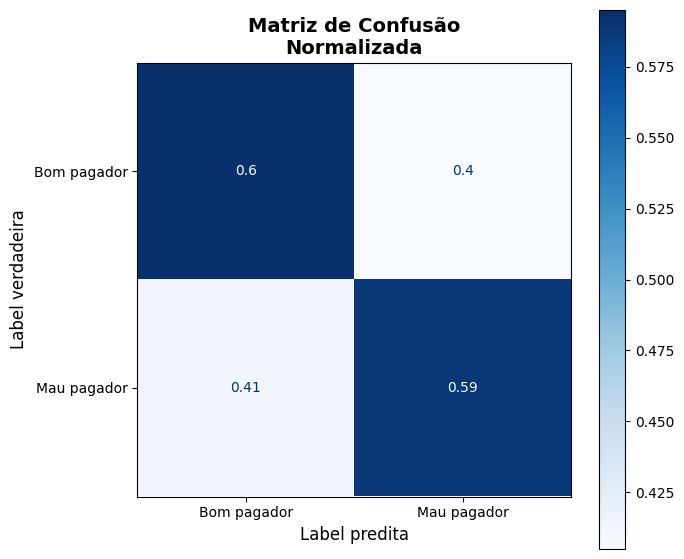


 
>> Classification Report

              precision    recall  f1-score   support

           0       0.59      0.60      0.59      4453
           1       0.59      0.59      0.59      4453

    accuracy                           0.59      8906
   macro avg       0.59      0.59      0.59      8906
weighted avg       0.59      0.59      0.59      8906


 
------------------------ ROC curve ------------------------



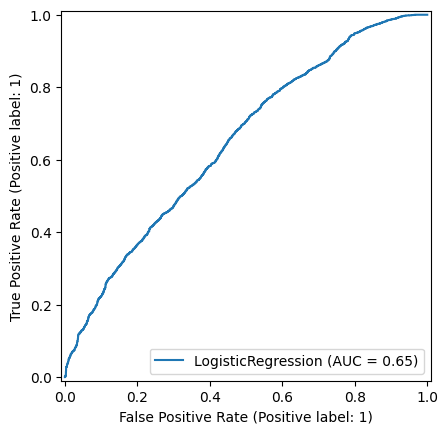

In [128]:
roda_modelo(modelo_logistico)

In [129]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()


------------------------ Resultados DecisionTreeClassifier() ------------------------
 

>> Métrica KS: KstestResult(statistic=0.24545250392993487, pvalue=7.79325619618862e-236, statistic_location=0.9912280701754386, statistic_sign=-1)

Confusion Matrix



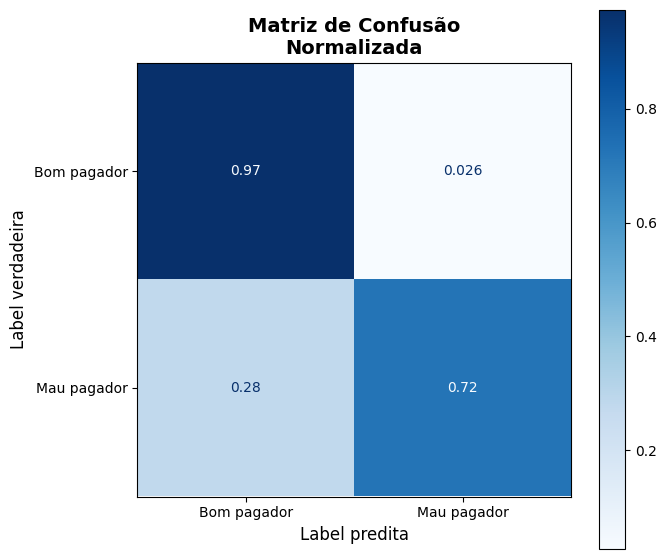


 
>> Classification Report

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      4453
           1       0.97      0.72      0.83      4453

    accuracy                           0.85      8906
   macro avg       0.87      0.85      0.85      8906
weighted avg       0.87      0.85      0.85      8906


 
------------------------ ROC curve ------------------------



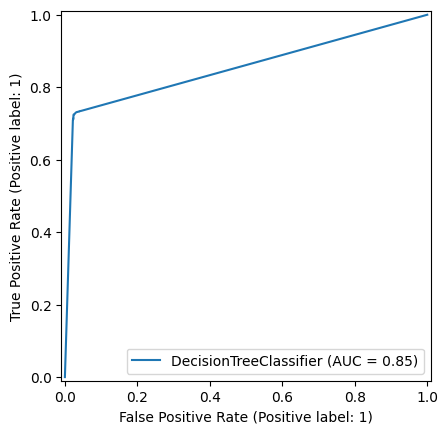

In [130]:
roda_modelo(modelo_tree)

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier()


------------------------ Resultados GradientBoostingClassifier() ------------------------
 

>> Métrica KS: KstestResult(statistic=0.14114080395239165, pvalue=9.945041996859767e-78, statistic_location=0.15677307206829527, statistic_sign=1)

Confusion Matrix



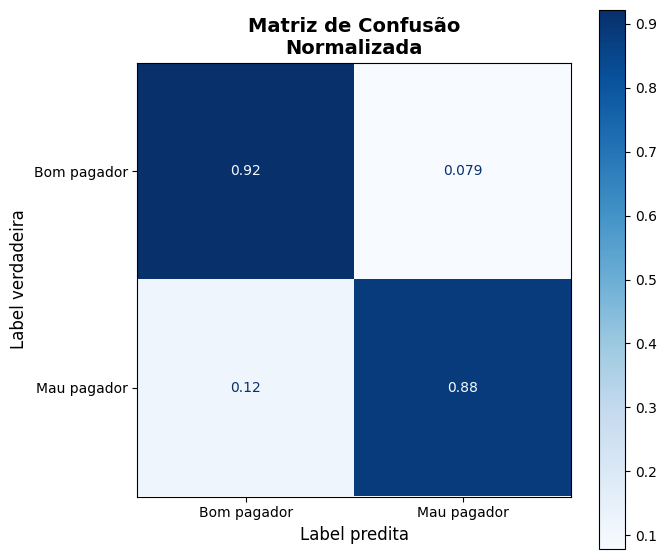


 
>> Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4453
           1       0.92      0.88      0.90      4453

    accuracy                           0.90      8906
   macro avg       0.90      0.90      0.90      8906
weighted avg       0.90      0.90      0.90      8906


 
------------------------ ROC curve ------------------------



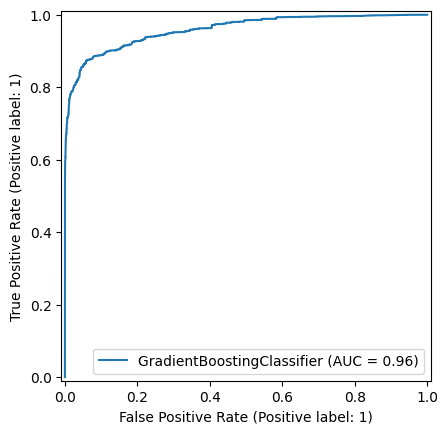

In [132]:
roda_modelo(modelo_xgb)

In [133]:
import joblib

In [134]:
joblib.dump(modelo_xgb, 'xgb.joblib')

['xgb.joblib']